# Inference Statistics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(5,5)})

In [2]:
# Uniform 
from scipy.stats import uniform

In [3]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)
data_uniform

array([21.73807932, 21.55939092, 19.17845728, ..., 22.49642178,
       26.57036929, 25.51004059])

C:\users\zhafran\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


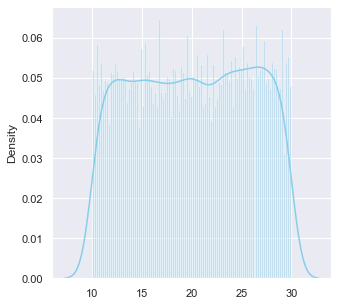

In [5]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                 )


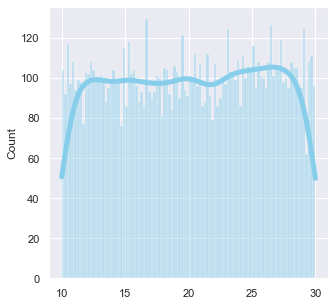

In [7]:
ax = sns.histplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth':5, 'alpha':1}
                 )


In [8]:
# normal distribution / Gaussian distribution
from scipy.stats import norm

data_norm = norm.rvs(size=10000, loc=0, scale=1)
data_norm

array([-0.07077246, -0.81397101, -1.44241804, ..., -0.02428165,
       -0.70379144,  1.33446464])

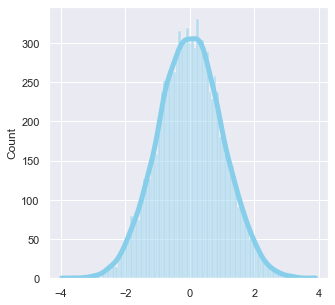

In [9]:
ax = sns.histplot(data_norm,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth':5, 'alpha':1}
                 )


In [11]:
# Gamma distribution
from scipy.stats import gamma

data_gamma = gamma.rvs(size=10000, a=5)
data_gamma

array([3.82645875, 8.47041719, 5.8660358 , ..., 3.25498679, 6.01921898,
       3.59617126])

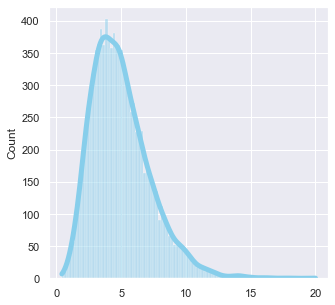

In [12]:
ax = sns.histplot(data_gamma,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth':5, 'alpha':1}
                 )


In [13]:
# Exponential Distribution
from scipy.stats import expon

data_expon = expon.rvs(size=10000, scale=1, loc=0)
data_expon

array([1.60679175, 1.04247037, 1.05318295, ..., 3.7031039 , 1.4936198 ,
       0.40715924])

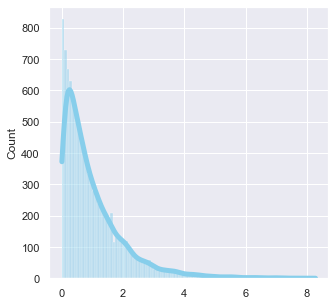

In [14]:
ax = sns.histplot(data_expon,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth':5, 'alpha':1}
                 )


In [15]:
# Exponential Distribution
from scipy.stats import poisson

data_poisson = poisson.rvs(size=10000, mu=3)
data_poisson

array([0, 2, 3, ..., 1, 1, 3])

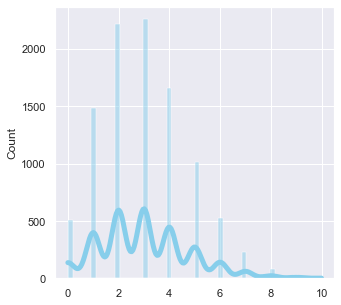

In [17]:
ax = sns.histplot(data_poisson,
                  kde=True,
                  color='skyblue',
                  line_kws={'linewidth':5, 'alpha':1}
                 )


In [18]:
# Binomial Distribution
from scipy.stats import binom

data_binom = binom.rvs(size=10000, n=10, p=0.8)
data_binom

array([8, 7, 8, ..., 8, 8, 8])

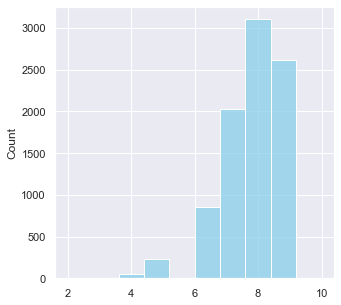

In [25]:
ax = sns.histplot(data_binom,
#                   kde=True,
                  color='skyblue',
#                   line_kws={'linewidth':5, 'alpha':1},
                  binwidth=0.8
                 )


In [27]:
# Bernoulli Distribution
from scipy.stats import bernoulli

data_bernoulli = bernoulli.rvs(size=10000, p=0.8)
data_bernoulli

array([1, 1, 1, ..., 0, 0, 1])

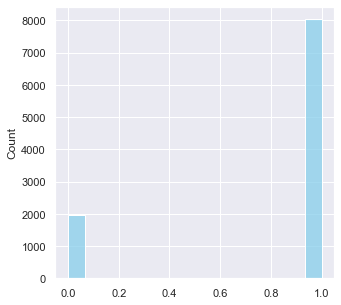

In [30]:
ax = sns.histplot(data_bernoulli,
#                   kde=True,
                  color='skyblue',
#                   line_kws={'linewidth':5, 'alpha':1},
#                   binwidth=0.8
                 )


# Confidence Interval

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
df['Sex1'] = df['sex'].replace({1: 'Male', 0: 'Female'})

In [36]:
dx = df[['target', 'Sex1']].dropna()
dx

,target,Sex1
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


In [37]:
pd.crosstab(dx['target'], dx['Sex1'])

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [40]:
n = 86 + 226
p_fm = 226/(n)
p_fm

0.7243589743589743

In [43]:
se_female = np.sqrt(p_fm * (1 - p_fm) / n)
se_female

0.02529714756803247

In [44]:
z_score = 1.96
lcb = p_fm - z_score * se_female
ucb = p_fm + z_score * se_female
lcb, ucb

(0.6747765651256307, 0.773941383592318)

In [45]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_fm, n)

(0.6747774762140357, 0.773940472503913)

In [47]:
df.groupby('Sex1').agg({'chol':[np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [48]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

In [49]:
mean_fe, sd, n, z

(261.45, 64.4, 312, 1.96)

In [50]:
se = sd / np.sqrt(n)
se

3.6459320499455985

In [51]:
lcb = mean_fe - z * se
ucb = mean_fe + z * se
lcb, ucb

(254.3039731821066, 268.59602681789335)

In [52]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=600)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=650)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds),
                                axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [54]:
normal_distribution_us_male_mass_pounds

array([192.92113967, 177.68165677, 196.54452491, 217.55271655,
       175.38031901, 175.38071303, 218.90110757, 199.4184335 ,
       169.73261474, 194.02144105, 169.87797537, 169.82248591,
       186.80709452, 135.08127413, 139.60197202, 167.5050993 ,
       156.69205311, 188.54193598, 159.20742219, 147.10471117,
       216.17557045, 175.58136879, 182.62067691, 146.80604353,
       167.93481461, 183.66214215, 153.37615414, 190.01675244,
       166.58467144, 173.99935   , 166.55904131, 225.45467643,
       180.67606661, 155.61493771, 200.74107789, 151.6997524 ,
       186.01272628, 133.96791703, 149.12353483, 185.72466966,
       198.72319792, 185.11283875, 178.22444122, 173.77351131,
       145.51547223, 163.723739  , 169.9446695 , 206.37093343,
       189.24683895, 138.68703627, 188.77801527, 171.75802527,
       164.75387199, 195.68023093, 205.74398854, 203.35072286,
       160.85877944, 173.57890298, 188.95032235, 204.41308305,
       169.49981829, 176.54418456, 154.44796062, 152.29

In [55]:
normal_distribution_us_female_mass_pounds

array([148.65374957, 111.71236287, 151.13133024, 161.82403289,
       141.09556787, 173.28950788, 114.97663762, 104.61759653,
        92.86815452, 164.91297485, 146.39604444, 130.77713724,
       138.15930978, 107.23924096, 185.80654355, 134.842866  ,
       134.40668548, 147.96686573, 142.5822031 , 136.92544853,
       114.60956198, 142.37230386, 173.40453892, 161.59924102,
       167.05010579, 120.75325512, 110.22869395, 129.23268776,
       133.22594807, 156.07221341,  94.76577815, 165.65010703,
       128.52382623, 122.60861646, 109.73370374,  95.59315322,
       150.10975285, 133.61299528, 103.62086021, 103.50826701,
       124.61273662, 168.71847356, 126.28899027,  98.93085503,
       126.59365259, 126.00008147,  72.66849386, 130.80551294,
       126.91944034, 147.31654003, 172.67703409, 156.78443065,
       126.08444881, 107.65643001, 188.61391567, 133.30280555,
       132.30644442, 131.46924808, 136.35786474, 128.82407094,
       119.37943585, 119.96910329, 131.27942806, 120.04

<AxesSubplot:xlabel='us_people_mass_pounds', ylabel='Count'>

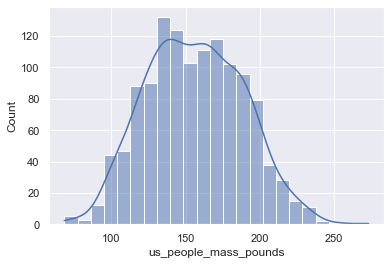

In [60]:
sns.histplot(
   df_ppl_mass['us_people_mass_pounds'],
    kde=True
)

In [62]:
pop_mean_mass = df_ppl_mass["us_people_mass_pounds"].mean()
pop_mean_mass

156.33661609099312

In [63]:
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

32.57436895793881

In [58]:
sample_means = []
n = 25
for sample in range(0, 300):
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], 
                                     size=n
                                    )
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)


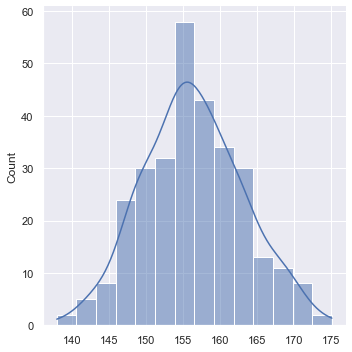

In [59]:
sns.displot(sample_means, kde=True)

In [65]:
median_of_sample_means = np.median(sample_means)
median_of_sample_means

156.0530076063609

In [66]:
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

156.39824798650625

In [67]:
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.7064859400958925

In [68]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.514873791587762

In [69]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [70]:
1 - tail * 2

0.950004209703559

In [72]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

143.62909535499423

In [73]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

169.16740061801826

In [75]:
# Hypothesis Testing
p_value = 0.07
alpha = 0.05
print(p_value > alpha)

True


In [76]:
n = 1018
pnull = .52
phat = .56

In [77]:
z_stats, p_value = sm.stats.proportions_ztest(phat*n, n, pnull, alternative='larger')
z_stats, p_value

(2.571067795759113, 0.005069273865860533)

In [78]:
da = pd.read_csv('./nhanes_2015_2016.csv')
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [79]:
females = da[da['RIAGENDR'] == 2]
male = da[da['RIAGENDR'] == 1]

In [81]:
n1 = len(females)
mu1 = females['BMXBMI'].mean()
sd1 = females['BMXBMI'].std()

n1, mu1, sd1

(2976, 29.93994565217392, 7.753318809545674)

In [82]:
n2 = len(male)
mu2 = male['BMXBMI'].mean()
sd2 = male['BMXBMI'].std()

n2, mu2, sd2

(2759, 28.778072111846942, 6.2525676168014614)

In [83]:
sm.stats.ztest(females['BMXBMI'].dropna(), 
               male['BMXBMI'].dropna(),
              alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

In [84]:
p_us = len(df[df['target']==1])/len(df)
p_us

0.5131707317073171

In [85]:
p0 = 0.42
se = np.sqrt(p0 * (1-p0) / len(df))
se

0.015416177755376521

In [87]:
be = p_us

he = 0.42
test_stat = (be-he)/se
test_stat

6.04369858636477

In [89]:
import scipy.stats.distributions as dist

In [90]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

1.5062078087269162e-09

In [ ]:
from scipy.stats import shapiro
